In [1]:
import os
import cv2
import pickle
import torch
import yaml


device ='cuda' if torch.cuda.is_available() else 'cpu'

print(device)


def to_MB(a):
    return a/1024.0/1024.0

cuda


In [2]:
# pickle_path = '/purestorage/AILAB/AI_2/youhans/workspace/reid/person/HumanBench/PA100k/dataset_all.pkl'
# root_path = "/purestorage/AILAB/AI_2/datasets/ReID/PA-100k/data/release_data/PA-100k/"
yaml_path = '/purestorage/AILAB/AI_2/youhans/workspace/reid/person/HumanBench/UniHCP/experiments/unihcp/release/peta_vitbase_coslr1e3_104k_b4324g88_h256_I2k_1_10_001_2I_fairscale_m256.yaml'
root = '/purestorage/AILAB/AI_2/youhans/workspace/reid/person/HumanBench/UniHCP/checkpoints'
checkpoint_path = 'peta_vitbase_modi/peta_vitbase_modi.pth'
zeroshot = False
checkpoint = os.path.join(root, checkpoint_path)
datatype = 'peta'    ###'PA-100k'

In [3]:
import core.models.backbones as backbones
import core.models.necks as necks
import core.models.decoders as decoders
from core.models.model_entry import model_entry



data = yaml.load(open(yaml_path, 'r'), Loader=yaml.SafeLoader)
# print(data)
pickle_path = data['tasks'][0]['dataset']['kwargs']['task_spec']['data_path']
root_path = data['tasks'][0]['dataset']['kwargs']['task_spec']['root_path']
height = data['tasks'][0]['dataset']['kwargs']['augmentation']['height']
width = data['tasks'][0]['dataset']['kwargs']['augmentation']['width']
backbone_structure = data['tasks'][0]['backbone']


backbone_module = backbones.backbone_entry(backbone_structure)
neck_structure = data['common']['neck']
neck_structure['kwargs']['backbone'] = backbone_module
neck_module = necks.neck_entry(neck_structure)


data['tasks'][0]['decoder']['kwargs']['ignore_value'] = None
data['tasks'][0]['decoder']['kwargs']['num_classes'] = 0
decoder_structure = data['tasks'][0]['decoder']
decoder_structure['kwargs']['backbone'] = backbone_module
decoder_structure['kwargs']['neck'] = neck_module
decoder_structure['kwargs']['ginfo'] = None
decoder_structure['kwargs']['bn_group'] = 1
# decoder_structure['kwargs']['loss_cfg']['kwargs'] = None
# print(decoder_structure['kwargs']['loss_cfg'])
decoder_module = decoders.decoder_entry(decoder_structure)
# print(decoder_module)

/purestorage/AILAB/AI_2/youhans/miniconda3/envs/humanbench/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


no mc
ceph can not be used
no mc
no mc
ceph can not be used
[rank 0] Position interpolate from (14, 14) to (84, 84)
Missing keys: []

finish load


In [4]:
pickle_file = pickle.load(open(pickle_path, 'rb'))
print(pickle_file.keys())

image_names = pickle_file['image_name']
labels = pickle_file['label']
id = pickle_file['attr_name']
# order = pickle_file['label_idx']['eval']
# id = [id[i] for i in order]

dict_keys(['description', 'reorder', 'root', 'label_idx', 'partition', 'weight_train', 'weight_trainval', 'image_name', 'label', 'attr_name'])


In [5]:
def preprocess(img, height, width):
    img = cv2.resize(img, (height, width))
    img = img / 255.0
    img = img.transpose(2, 0, 1)
    img = torch.from_numpy(img).float()
    img = img.unsqueeze(0)
    return img



In [6]:
model = model_entry(backbone_module, neck_module, decoder_module)
checkpoint = torch.load(checkpoint, map_location=device)
model.load_state_dict(checkpoint['state_dict'], strict=False)

[rank 0] add param pos_embed as backbone_specific
[rank 0] add param patch_embed.proj.weight as backbone_specific
[rank 0] add param patch_embed.proj.bias as backbone_specific
[rank 0] add param blocks.0.norm1.weight as backbone_specific
[rank 0] add param blocks.0.norm1.bias as backbone_specific
[rank 0] add param blocks.0.attn.qkv.weight as backbone_specific
[rank 0] add param blocks.0.attn.qkv.bias as backbone_specific
[rank 0] add param blocks.0.attn.proj.weight as backbone_specific
[rank 0] add param blocks.0.attn.proj.bias as backbone_specific
[rank 0] add param blocks.0.norm2.weight as backbone_specific
[rank 0] add param blocks.0.norm2.bias as backbone_specific
[rank 0] add param blocks.0.mlp.fc1.weight as backbone_specific
[rank 0] add param blocks.0.mlp.fc1.bias as backbone_specific
[rank 0] add param blocks.0.mlp.fc2.weight as backbone_specific
[rank 0] add param blocks.0.mlp.fc2.bias as backbone_specific
[rank 0] add param blocks.1.norm1.weight as backbone_specific
[rank 0]

_IncompatibleKeys(missing_keys=['backbone_module.pos_embed', 'backbone_module.patch_embed.proj.weight', 'backbone_module.patch_embed.proj.bias', 'backbone_module.blocks.0.norm1.weight', 'backbone_module.blocks.0.norm1.bias', 'backbone_module.blocks.0.attn.qkv.weight', 'backbone_module.blocks.0.attn.qkv.bias', 'backbone_module.blocks.0.attn.proj.weight', 'backbone_module.blocks.0.attn.proj.bias', 'backbone_module.blocks.0.norm2.weight', 'backbone_module.blocks.0.norm2.bias', 'backbone_module.blocks.0.mlp.fc1.weight', 'backbone_module.blocks.0.mlp.fc1.bias', 'backbone_module.blocks.0.mlp.fc2.weight', 'backbone_module.blocks.0.mlp.fc2.bias', 'backbone_module.blocks.1.norm1.weight', 'backbone_module.blocks.1.norm1.bias', 'backbone_module.blocks.1.attn.qkv.weight', 'backbone_module.blocks.1.attn.qkv.bias', 'backbone_module.blocks.1.attn.proj.weight', 'backbone_module.blocks.1.attn.proj.bias', 'backbone_module.blocks.1.norm2.weight', 'backbone_module.blocks.1.norm2.bias', 'backbone_module.bl

In [7]:
model.to(device)
model.eval()

model_entry(
  (backbone_module): ViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU(approximate='none')
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (drop): Dropout(p=0.0, inplace=False)
        )
      )
      (1): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
  

/purestorage/AILAB/AI_2/datasets/ReID/PETA/PETA_dataset/CAVIAR4REID/archive/0003_002.jpg


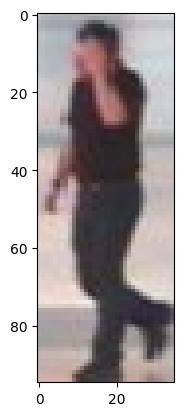

torch.Size([1, 3, 192, 256])


In [41]:
from matplotlib.pyplot import imshow, show
# img_dir = "/purestorage/AILAB/AI_2/youhans/workspace/reid/person/HumanBench" + "/test/"
# img_name = "pedestrian7" + '.jpg'
# img_path = os.path.join(img_dir, img_name)
# img_path = "/purestorage/AILAB/AI_2/datasets/ReID/PA-100k/data/release_data/PA-100k/000013.jpg"
img_path = "/purestorage/AILAB/AI_2/datasets/ReID/PETA/PETA_dataset/CAVIAR4REID/archive/0003_002.jpg"
print(img_path)
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imshow(img_rgb)
show()

img = preprocess(img, height, width)
img = img.to(device)
print(img.shape)
batch = {'image': img, 'label': None}

In [42]:
starter, ender = torch.cuda.Event(enable_timing=True), torch.cuda.Event(enable_timing=True)

starter.record()
for _ in range(3):
    results = model(batch, 0)
ender.record()
print(f"After model to device: {to_MB(torch.cuda.memory_allocated()):.2f}MB")
torch.cuda.synchronize()
curr_time = starter.elapsed_time(ender) ##
print(f'{curr_time:.2f}ms')

After model to device: 1339.32MB
105.37ms


In [43]:
probs = torch.sigmoid(results['logit']).cpu().data.numpy()
probs = probs.tolist()
if datatype == 'PA-100k':
    for i, prob in enumerate(probs):
        print(id[i], prob)
elif datatype == 'peta':
    from easydict import EasyDict
    if zeroshot:

        gender = [16, 87]  # stay 2
        age = [0,1,2,3,80] # stay 4
        lowerlong = [6,8,12,31,84,94,95,102] # modified 1
        lowershort = [25,90] # modified 1
        lowershortskirt = [27] # stay 1
        lowerlongskirt = [92] # stay 1
        upperlongsleeve = [7,9,11,21,29,93,100,103,104] # modified 1
        uppershortsleeve = [26,32] # modified 1
        uppernosleeve = [97] # stay 1
        hair = [15, 82, 98] # stay 3
        lowercolor = list(range(46, 57)) # stay
        uppercolor = list(range(35, 46)) # stay
        haircolor = list(range(57, 68)) # stay

        value_list = gender + age + lowerlong + lowershort + lowershortskirt + lowerlongskirt + upperlongsleeve + \
            uppershortsleeve + uppernosleeve + hair + lowercolor + uppercolor + haircolor

        lowerbody = lowerlong + lowershort + lowershortskirt + lowerlongskirt
        upperbody = upperlongsleeve + uppershortsleeve + uppernosleeve

        answers_idx = EasyDict()

        attr_list = [str(w) for w in id]

        answers_idx["gender"] = []
        answers_idx["age"] = []
        # answers_idx["lowerbodylong"] = []
        # answers_idx["lowerbodyshort"] = []
        # answers_idx["lowerbodyshortskirt"] = []
        # answers_idx["lowerbodylongskirt"] = []
        # answers_idx["upperbodylongsleeve"] = []
        # answers_idx["upperbodyshortsleeve"] = []
        # answers_idx["upperbodynosleeve"] = []
        answers_idx["lowerbody"] = []
        answers_idx["upperbody"] = []
        answers_idx["hair"] = []
        answers_idx["lowercolor"] = []
        answers_idx["uppercolor"] = []
        answers_idx["haircolor"] = []


        for a, b in zip(value_list, probs):
            list_idx = {}
            if a in gender:
                list_idx[id[a]] = b
                answers_idx["gender"].append(list_idx)
            elif a in age:
                list_idx[id[a]] = b
                answers_idx["age"].append(list_idx)

            elif a in lowerbody:
                list_idx[id[a]] = b
                answers_idx["lowerbody"].append(list_idx)

            elif a in upperbody:
                list_idx[id[a]] = b
                answers_idx["upperbody"].append(list_idx)
            # elif a in lowerlong:
            #     list_idx[id[a]] = b
            #     answers_idx["lowerbodylong"].append(list_idx)
            # elif a in lowershort:
            #     list_idx[id[a]] = b
            #     answers_idx["lowerbodyshort"].append(list_idx)
            # elif a in lowershortskirt:
            #     list_idx[id[a]] = b
            #     answers_idx["lowerbodyshortskirt"].append(list_idx)
            #
            # elif a in lowerlongskirt:
            #     list_idx[id[a]] = b
            #     answers_idx["lowerbodylongskirt"].append(list_idx)
            #
            # elif a in upperlongsleeve:
            #     list_idx[id[a]] = b
            #     answers_idx["upperbodylongsleeve"].append(list_idx)
            #
            # elif a in uppershortsleeve:
            #     list_idx[id[a]] = b
            #     answers_idx["upperbodyshortsleeve"].append(list_idx)
            #
            # elif a in uppernosleeve:
            #     list_idx[id[a]] = b
            #     answers_idx["upperbodynosleeve"].append(list_idx)

            elif a in hair:
                list_idx[id[a]] = b
                answers_idx["hair"].append(list_idx)

            elif a in lowercolor:
                list_idx[id[a]] = b
                answers_idx["lowercolor"].append(list_idx)

            elif a in uppercolor:
                list_idx[id[a]] = b
                answers_idx["uppercolor"].append(list_idx)

            elif a in haircolor:
                list_idx[id[a]] = b
                answers_idx["haircolor"].append(list_idx)


        answers = {}
        for f_key, f_value in answers_idx.items():
            prev = 0
            answer = {}
            for val in f_value:
                # print(val)
                for s_key, s_value in val.items():
                    # print(s_key, s_value)
                    if s_value > prev:
                        # print("True")
                        # print(prev)
                        prev = s_value
                        prev_key = s_key
                    else:
                        # print("False")
                        pass
            answer[prev_key] = prev
            answers[f_key] = answer

        print(answers)
        # print(answers_idx)
    else:
        answers_idx = EasyDict()
        attr_list = [str(w) for w in id]

        answers_idx["gender"] = []
        answers_idx["age"] = []
        # answers_idx["lowerbodylong"] = []
        # answers_idx["lowerbodyshort"] = []
        # answers_idx["lowerbodyshortskirt"] = []
        # answers_idx["lowerbodylongskirt"] = []
        # answers_idx["upperbodylongsleeve"] = []
        # answers_idx["upperbodyshortsleeve"] = []
        # answers_idx["upperbodynosleeve"] = []
        answers_idx["lowerbody"] = []
        answers_idx["upperbody"] = []
        answers_idx["hair"] = []
        answers_idx["lowercolor"] = []
        answers_idx["uppercolor"] = []
        answers_idx["haircolor"] = []


        for a, b in enumerate(probs):
            list_idx = {}
            if a in [0, 1]:
                list_idx[id[a]] = b
                answers_idx["gender"].append(list_idx)
            elif a in range(2, 7):
                list_idx[id[a]] = b
                answers_idx["age"].append(list_idx)

            elif a in range(7, 11):
                list_idx[id[a]] = b
                answers_idx["lowerbody"].append(list_idx)

            elif a in range(11, 14):
                list_idx[id[a]] = b
                answers_idx["upperbody"].append(list_idx)
            # elif a in lowerlong:
            #     list_idx[id[a]] = b
            #     answers_idx["lowerbodylong"].append(list_idx)
            # elif a in lowershort:
            #     list_idx[id[a]] = b
            #     answers_idx["lowerbodyshort"].append(list_idx)
            # elif a in lowershortskirt:
            #     list_idx[id[a]] = b
            #     answers_idx["lowerbodyshortskirt"].append(list_idx)
            #
            # elif a in lowerlongskirt:
            #     list_idx[id[a]] = b
            #     answers_idx["lowerbodylongskirt"].append(list_idx)
            #
            # elif a in upperlongsleeve:
            #     list_idx[id[a]] = b
            #     answers_idx["upperbodylongsleeve"].append(list_idx)
            #
            # elif a in uppershortsleeve:
            #     list_idx[id[a]] = b
            #     answers_idx["upperbodyshortsleeve"].append(list_idx)
            #
            # elif a in uppernosleeve:
            #     list_idx[id[a]] = b
            #     answers_idx["upperbodynosleeve"].append(list_idx)

            elif a in range(14, 17):
                list_idx[id[a]] = b
                answers_idx["hair"].append(list_idx)

            elif a in range(17, 28):
                list_idx[id[a]] = b
                answers_idx["lowercolor"].append(list_idx)

            elif a in range(28, 39):
                list_idx[id[a]] = b
                answers_idx["uppercolor"].append(list_idx)

            elif a in range(39, 50):
                list_idx[id[a]] = b
                answers_idx["haircolor"].append(list_idx)


        answers = {}
        for f_key, f_value in answers_idx.items():
            prev = 0
            answer = {}
            for val in f_value:
                # print(val)
                for s_key, s_value in val.items():
                    # print(s_key, s_value)
                    if s_value > prev:
                        # print("True")
                        # print(prev)
                        prev = s_value
                        prev_key = s_key
                    else:
                        # print("False")
                        pass
            answer[prev_key] = prev
            answers[f_key] = answer

        print(answers)


{'gender': {'personalMale': 0.7901217937469482}, 'age': {'personalLess30': 0.7899942994117737}, 'lowerbody': {'lowerbodylongskirt': 0.7902551293373108}, 'upperbody': {'upperbodylongsleeve': 0.790153443813324}, 'hair': {'hairBald': 0.7899038195610046}, 'lowercolor': {'lowerBodyPurple': 0.7901937365531921}, 'uppercolor': {'upperBodyOrange': 0.7900944352149963}, 'haircolor': {'hairPurple': 0.7901229858398438}}
